<a href="https://colab.research.google.com/github/akaramgit/akaram_project/blob/main/CanadianBank_Time_Series_Prohet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install FB Prophet and yfinance
!pip install fbprophet
!pip install yfinance

     |████████████████████████████████| 6.4 MB 19.2 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
#import pd, plt and Prophet
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime
from fbprophet import Prophet

In [3]:
#read time series data from Yahoo Finance by yfinance
HSI = yf.Ticker("TD") 
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2021,9,5)
hist = HSI.history(start=start, end=end, auto_adjust=True)
hist
#if import data via url: #url="https://query1.finance.yahoo.com/v7/finance/download/^HSI?period1=1420066800&period2=
#1622437200&interval=1d&events=history&crumb=tO1hNZoUQeQ"  
#df=pd.read_csv(url)   
#print(df.head())

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02,32.643623,32.774943,32.180545,32.422451,1048600,0.47,0
2015-01-05,32.235849,32.311878,31.399542,31.703653,1698800,0.00,0
2015-01-06,31.468649,31.544677,30.639256,31.040129,1952600,0.00,0
2015-01-07,31.143804,31.475562,30.715281,30.936453,1606000,0.00,0
2015-01-08,31.081592,31.254382,30.901888,31.095415,1102300,0.00,0
...,...,...,...,...,...,...,...
2021-08-30,63.956156,64.139739,63.405393,63.434380,1422300,0.00,0
2021-08-31,63.308761,63.965812,62.738676,62.748341,1649300,0.00,0
2021-09-01,62.970575,63.762900,62.777327,62.873951,2010500,0.00,0


In [4]:
#show the data table in Date, Stock Price (Close)
df = pd.DataFrame()
df['ds'] = hist.index 
df['y'] = hist['Close'].values
df.tail(10)
#show the information and descriptions of the data collected
#print(df.reset_index().info())
#print(df.reset_index().describe())

,ds,y
1671,2021-08-23,65.888664
1672,2021-08-24,65.792023
1673,2021-08-25,65.801697
1674,2021-08-26,63.878860
1675,2021-08-27,63.840210
1676,2021-08-30,63.434380
1677,2021-08-31,62.748341
1678,2021-09-01,62.873951
1679,2021-09-02,63.550323
1680,2021-09-03,63.608311


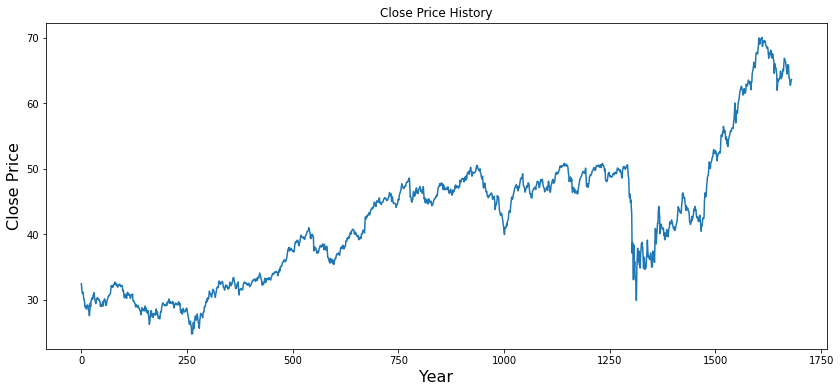

In [5]:
#plot the chart
plt.figure(figsize=(14,6))
plt.title('Close Price History')
plt.plot(df['y'])
plt.xlabel('Year', fontsize=16)
plt.ylabel('Close Price' , fontsize=16)
plt.show()

In [6]:
#define the forecasting model parameters, trend = logistic growth, yearly seasonality = multiplicative, no holiday parameter
#model_params = {"daily_seasonality": False, "weekly_seasonality": False, "yearly_seasonality": True, "seasonality_mode": "multiplicative", "growth": "logistic"}

In [7]:
#define the forecasting model and set the cap
model = Prophet()

In [8]:
#define future as the future 365 days' data, and define forecast as predicting the future by the forecasting model
model.fit(df)
future = model.make_future_dataframe(365, freq='D')
forecast = model.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


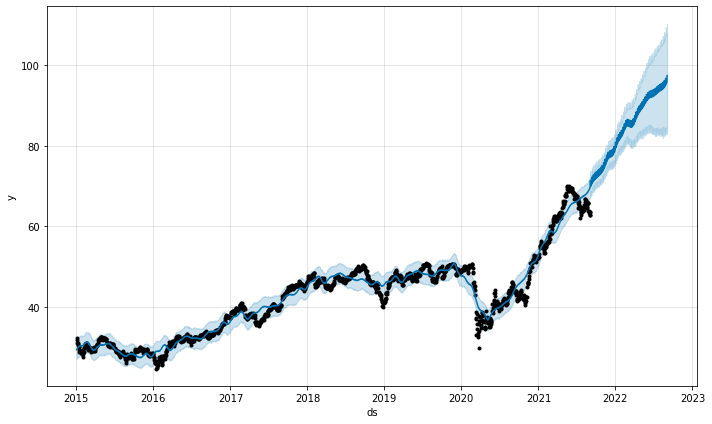

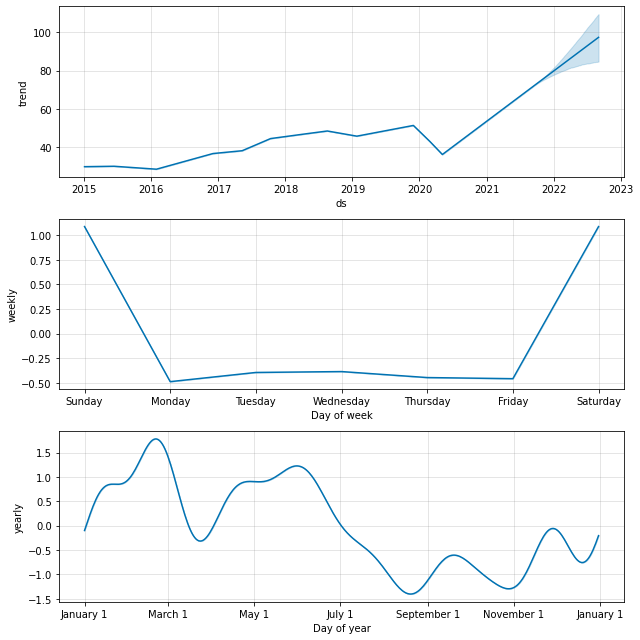

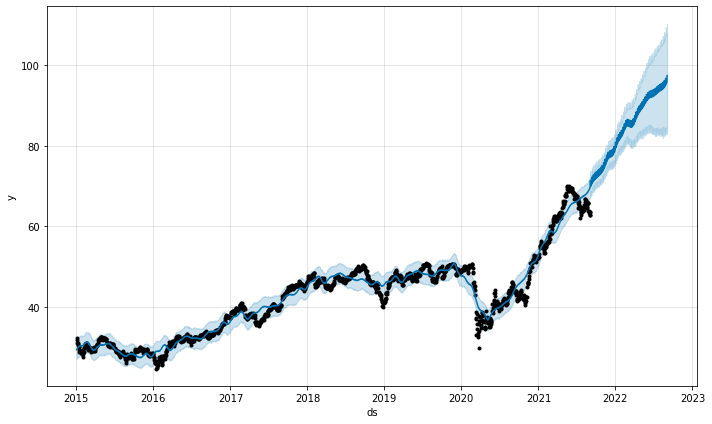

In [9]:
#plot the model forecast chart with component charts in trend and seasonality 
model.plot_components(forecast)
model.plot(forecast)

In [10]:
from fbprophet.plot import plot_plotly, plot_components_plotly
import plotly.offline as py
%matplotlib inline

In [11]:
fig = plot_plotly(model, forecast)
py.iplot(fig)
fig.show(renderer="colab")

In [12]:
fig = plot_components_plotly(model, forecast) 
py.iplot(fig)
fig.show(renderer="colab")

In [13]:
plot_plotly(model, forecast, trend=True, changepoints=True)

In [14]:
fig.update_layout(title="plpt_plotly")